# An Empirical Comparison of Supervised and Self-Supervised Learning

In [1]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.svm import SVC
from sklearn.manifold import TSNE

from train import train_encoder, train_ConvNet, TrainArgs
from test import encode_data, plot_tsne, test_conv

from torch.utils.data import Subset

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%load_ext autoreload
%autoreload 2

## Baseline: convolutional neural network

In [3]:
conv_args = TrainArgs(batchsize = 10)

In [4]:
ConvNet, conv_losses = train_ConvNet(conv_args)

100%|██████████| 170498071/170498071 [00:22<00:00, 7745538.54it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 0, i:   999] avg mini-batch loss: 2.297
[epoch: 0, i:  1499] avg mini-batch loss: 2.286
[epoch: 0, i:  1999] avg mini-batch loss: 2.239
[epoch: 0, i:  2499] avg mini-batch loss: 2.131
[epoch: 0, i:  2999] avg mini-batch loss: 2.045
[epoch: 0, i:  3499] avg mini-batch loss: 1.986
[epoch: 0, i:  3999] avg mini-batch loss: 1.941
[epoch: 0, i:  4499] avg mini-batch loss: 1.893
[epoch: 0, i:  4999] avg mini-batch loss: 1.863
[epoch: 1, i:   499] avg mini-batch loss: 1.820
[epoch: 1, i:   999] avg mini-batch loss: 1.806
[epoch: 1, i:  1499] avg mini-batch loss: 1.766
[epoch: 1, i:  1999] avg mini-batch loss: 1.707
[epoch: 1, i:  2499] avg mini-batch loss: 1.723
[epoch: 1, i:  2999] avg mini-batch loss: 1.709
[epoch: 1, i:  3499] avg mini-batch loss: 1.691
[epoch: 1, i:  3999] avg mini-batch loss: 1.660
[epoch: 1, i:  4499] avg mini-batch loss: 1.652
[epoch: 1, i:  4999] 

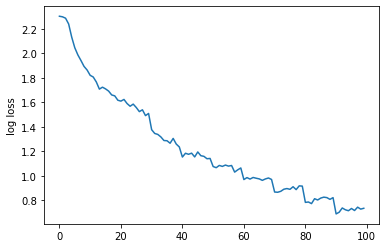

In [5]:
plt.plot(conv_losses);
plt.ylabel('log loss');

In [6]:
print(f'Baseline accuracy of the convolutional model is {test_conv(ConvNet)*100} %')

Files already downloaded and verified
Baseline accuracy of the convolutional model is 64.32 %


## Momentum Contrast

### Pre-Training the Encoder

In [7]:
encoder_args = TrainArgs(epochs = 20)

In [8]:
encoder, enc_losses = train_encoder(encoder_args)

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 	Loss: 0.058371
Train Epoch: 2 	Loss: 0.042807
Train Epoch: 3 	Loss: 0.032130
Train Epoch: 4 	Loss: 0.024924
Train Epoch: 5 	Loss: 0.019957
Train Epoch: 6 	Loss: 0.016443
Train Epoch: 7 	Loss: 0.013940
Train Epoch: 8 	Loss: 0.012108
Train Epoch: 9 	Loss: 0.010686
Train Epoch: 10 	Loss: 0.009566
Train Epoch: 11 	Loss: 0.008698
Train Epoch: 12 	Loss: 0.008013
Train Epoch: 13 	Loss: 0.007380
Train Epoch: 14 	Loss: 0.006946
Train Epoch: 15 	Loss: 0.006430
Train Epoch: 16 	Loss: 0.006004
Train Epoch: 17 	Loss: 0.005691
Train Epoch: 18 	Loss: 0.005370
Train Epoch: 19 	Loss: 0.005055
Train Epoch: 20 	Loss: 0.004768


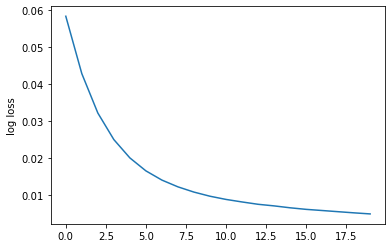

In [9]:
plt.plot(enc_losses);
plt.ylabel('log loss');

### Visualizing Embeddings

To do:
1. Implement multiple training ratios
2. Hyperparameter tuning?
3. Plot the loss functions

In [10]:
data, targets = encode_data()

Files already downloaded and verified


100%|██████████| 10000/10000 [01:44<00:00, 96.05it/s]


In [11]:
ret = TSNE(n_components=2, random_state=0, n_jobs=8).fit_transform(data)

Files already downloaded and verified


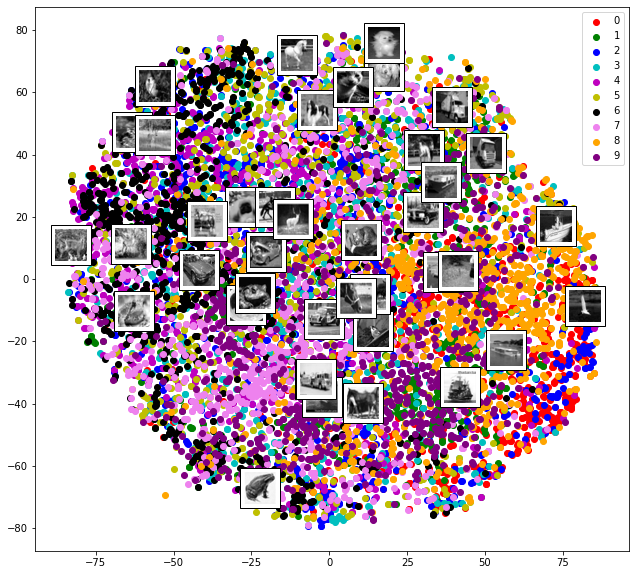

In [12]:
plot_tsne(targets, ret)

### Training SVM on freezed features

In [13]:
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified


100%|██████████| 50000/50000 [08:52<00:00, 93.94it/s]


Files already downloaded and verified


100%|██████████| 10000/10000 [01:48<00:00, 92.46it/s]


In [14]:
svm = SVC(C = 100,  gamma='scale')
svm.fit(X_train, y_train)

SVC(C=100)

In [15]:
svm.score(X_test, y_test)

0.5295

### Multiple Runs

In [16]:
# subsample so things run faster
X_train, y_train = encode_data(train=True, subsample = True)
X_test, y_test = encode_data(train=False, subsample = True)

Files already downloaded and verified


100%|██████████| 5000/5000 [00:52<00:00, 95.90it/s]


Files already downloaded and verified


100%|██████████| 1000/1000 [00:10<00:00, 92.49it/s]


In [17]:
conv_args = TrainArgs(batchsize = 10, epochs = 5)

In [18]:
n = 3
conv_errors = []
svm_errors = []
for i in range(n):
    ConvNet, conv_losses = train_ConvNet(conv_args, subsample=True)
    conv_errors.append(test_conv(ConvNet, subsample=True)*100)
    
    svm = SVC(C = 100,  gamma='scale')
    svm.fit(X_train, y_train)   
    svm_errors.append(svm.score(X_test, y_test))

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.303
[epoch: 1, i:   499] avg mini-batch loss: 2.302
[epoch: 2, i:   499] avg mini-batch loss: 2.301
[epoch: 3, i:   499] avg mini-batch loss: 2.298
[epoch: 4, i:   499] avg mini-batch loss: 2.293
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.298
[epoch: 2, i:   499] avg mini-batch loss: 2.288
[epoch: 3, i:   499] avg mini-batch loss: 2.252
[epoch: 4, i:   499] avg mini-batch loss: 2.179
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.294
[epoch: 2, i:   499] avg mini-batch loss: 2.264
[epoch: 3, i:   499] avg mini-batch loss: 2.179
[epoch: 4, i:   499] avg mini-batch loss: 2.100
Files already downloaded and verified


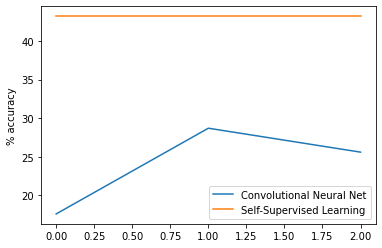

In [19]:
plt.plot(np.array(conv_errors), label="Convolutional Neural Net")
plt.plot(np.array(svm_errors)*100, label="Self-Supervised Learning")
plt.legend()
plt.ylabel('% accuracy')
plt.savefig('./results/comparison.png')

In [20]:
conv_errors

[17.599999999999998, 28.7, 25.6]

In [21]:
svm_errors

[0.432, 0.432, 0.432]

In [22]:
conv_errors

[17.599999999999998, 28.7, 25.6]